<h1>NOTEBOOK1: DATA SET PROCESSING</h1>

In this notebook I'm preparing data set


In [203]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os


In [204]:
smoking_df = pd.read_csv('smoking.csv', sep=',')
smoking_df.drop(columns=smoking_df.columns[0], axis=1, inplace=True)
smoking_df.describe()


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [205]:
smoking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

From dataframe describtion we can see that
1. Columns are equal, same length of 55692 values
2. Values are realistic, nothing is clearly wrong.
3. There are no empty values in dataframe

In [206]:
# detecting how much of smokers are in dataset
smoking_df['smoking'].value_counts(normalize=True)


smoking
0    0.632712
1    0.367288
Name: proportion, dtype: float64

As we can see, our dataset is unbalanced. Although balance of ratio 1:2 is not considered significant, we will still perform optimization to be able to compare raw dataset with more processed one! 
Firstable we have to split gender, oral and tartar columns from String values to 2 binary values columns. Next we are preparing syntetic values with SMOTE algorithm

SMOTE (Synthetic Minority Over-sampling Technique) is a popular method for oversampling imbalanced datasets. It generates synthetic samples of the minority class by selecting similar instances and creating new ones in the feature space.

In [207]:
smoking_df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

gender                 False
age                     True
height(cm)              True
weight(kg)              True
waist(cm)               True
eyesight(left)          True
eyesight(right)         True
hearing(left)           True
hearing(right)          True
systolic                True
relaxation              True
fasting blood sugar     True
Cholesterol             True
triglyceride            True
HDL                     True
LDL                     True
hemoglobin              True
Urine protein           True
serum creatinine        True
AST                     True
ALT                     True
Gtp                     True
oral                   False
dental caries           True
tartar                 False
smoking                 True
dtype: bool

In [208]:
smoking_df.gender.replace({'F':0,'M':1},inplace=True)
smoking_df.oral.replace({'Y': 1, 'N': 0}, inplace=True)
smoking_df.tartar.replace({'Y': 1, 'N': 0}, inplace=True)

In [209]:
smoking_df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

gender                 True
age                    True
height(cm)             True
weight(kg)             True
waist(cm)              True
eyesight(left)         True
eyesight(right)        True
hearing(left)          True
hearing(right)         True
systolic               True
relaxation             True
fasting blood sugar    True
Cholesterol            True
triglyceride           True
HDL                    True
LDL                    True
hemoglobin             True
Urine protein          True
serum creatinine       True
AST                    True
ALT                    True
Gtp                    True
oral                   True
dental caries          True
tartar                 True
smoking                True
dtype: bool

In [210]:
from imblearn.over_sampling import SMOTE

X = smoking_df.drop('smoking', axis=1) # features
y = smoking_df['smoking'] # labels

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y) # type: ignore

df_smote = pd.concat([X_smote, y_smote], axis=1)

In [211]:
df_smote["smoking"].value_counts()

smoking
0    35237
1    35237
Name: count, dtype: int64

### DECISION TREE -> smote

In [212]:
(train_set, test_set) = train_test_split(df_smote.values, train_size=0.7, 
random_state=420)
print(train_set)


[[  1.  45. 170. ...   0.   0.   1.]
 [  0.  45. 150. ...   0.   1.   0.]
 [  1.  40. 174. ...   0.   0.   1.]
 ...
 [  1.  25. 175. ...   0.   0.   0.]
 [  1.  37. 172. ...   0.   0.   1.]
 [  1.  50. 155. ...   0.   1.   1.]]


In [213]:
from sklearn import tree
train_inputs = train_set[:, 0:25]
train_classes = train_set[:, 25]
test_inputs = test_set[:, 0:25]
test_classes = test_set[:, 25]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_inputs, train_classes)

[Text(0.35038729048440925, 0.9871794871794872, 'x[0] <= 0.5\ngini = 0.5\nsamples = 49331\nvalue = [24761, 24570]'),
 Text(0.06290149124905448, 0.9615384615384616, 'x[1] <= 39.5\ngini = 0.149\nsamples = 14872\nvalue = [13664, 1208]'),
 Text(0.027411304112208653, 0.9358974358974359, 'x[1] <= 25.5\ngini = 0.142\nsamples = 78\nvalue = [6, 72]'),
 Text(0.027213204629124493, 0.9102564102564102, 'x[21] <= 14.0\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.02701510514604033, 0.8846153846153846, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.027411304112208653, 0.8846153846153846, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.027609403595292816, 0.9102564102564102, 'gini = 0.0\nsamples = 70\nvalue = [0, 70]'),
 Text(0.09839167838590031, 0.9358974358974359, 'x[16] <= 14.802\ngini = 0.142\nsamples = 14794\nvalue = [13658, 1136]'),
 Text(0.0637208625754964, 0.9102564102564102, 'x[21] <= 22.132\ngini = 0.125\nsamples = 13987\nvalue = [13054, 933]'),
 Text(0.027807503078376976, 0.

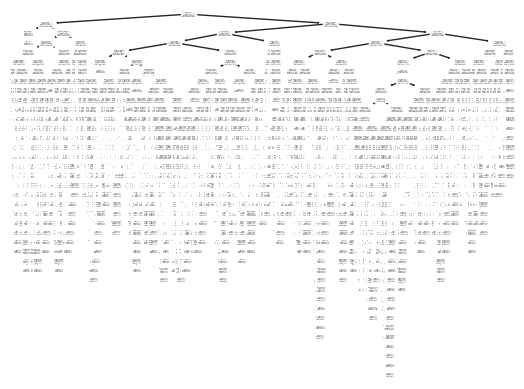

In [214]:
tree.plot_tree(clf)

In [215]:
clf.score(test_inputs, test_classes)

0.8063661732015325

In [216]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(test_classes, clf.predict(test_inputs))

array([[8361, 2115],
       [1979, 8688]])

### DESICION TREE - normal


In [217]:
(train_set, test_set) = train_test_split(smoking_df.values, train_size=0.7, 
random_state=420)
print(train_set)


[[  1.  50. 165. ...   0.   1.   0.]
 [  1.  45. 175. ...   1.   1.   0.]
 [  1.  55. 170. ...   0.   1.   0.]
 ...
 [  1.  25. 175. ...   0.   0.   0.]
 [  1.  35. 170. ...   0.   0.   0.]
 [  1.  50. 155. ...   0.   1.   1.]]


In [218]:
train_inputs = train_set[:, 0:25]
train_classes = train_set[:, 25]
test_inputs = test_set[:, 0:25]
test_classes = test_set[:, 25]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_inputs, train_classes)

[Text(0.339924435430808, 0.9848484848484849, 'x[0] <= 0.5\ngini = 0.465\nsamples = 38984\nvalue = [24620, 14364]'),
 Text(0.0748813158642271, 0.9545454545454546, 'x[21] <= 23.5\ngini = 0.081\nsamples = 14121\nvalue = [13526, 595]'),
 Text(0.035993989315729495, 0.9242424242424242, 'x[20] <= 11.5\ngini = 0.059\nsamples = 10117\nvalue = [9811, 306]'),
 Text(0.01231267905142165, 0.8939393939393939, 'x[21] <= 13.5\ngini = 0.093\nsamples = 2258\nvalue = [2148, 110]'),
 Text(0.007434127430385808, 0.8636363636363636, 'x[13] <= 140.0\ngini = 0.052\nsamples = 1262\nvalue = [1228, 34]'),
 Text(0.0033355496638797074, 0.8333333333333334, 'x[12] <= 126.5\ngini = 0.042\nsamples = 1197\nvalue = [1171, 26]'),
 Text(0.0006407058442717727, 0.803030303030303, 'x[23] <= 0.5\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.00042713722951451515, 0.7727272727272727, 'x[11] <= 103.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.00021356861475725758, 0.7424242424242424, 'gini = 0.0\nsamples = 9\nv

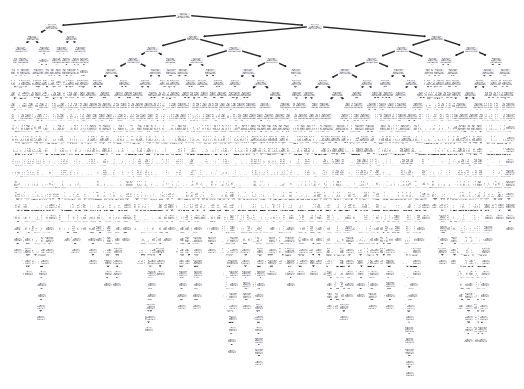

In [219]:
tree.plot_tree(clf)

In [220]:
clf.score(test_inputs, test_classes)

0.7723844864735456

In [221]:
confusion_matrix(test_classes, clf.predict(test_inputs))

array([[8662, 1955],
       [1848, 4243]])

### NAIVE BAYES - smote 

In [222]:
(train_set, test_set) = train_test_split(df_smote.values, train_size=0.7, 
random_state=420)
print(train_set)

[[  1.  45. 170. ...   0.   0.   1.]
 [  0.  45. 150. ...   0.   1.   0.]
 [  1.  40. 174. ...   0.   0.   1.]
 ...
 [  1.  25. 175. ...   0.   0.   0.]
 [  1.  37. 172. ...   0.   0.   1.]
 [  1.  50. 155. ...   0.   1.   1.]]


In [223]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Build a Gaussian Classifier

model = GaussianNB()

# Model training
model.fit(train_inputs, train_classes)

# Predict Output
predicted = model.predict(test_inputs)

acc = accuracy_score(predicted, test_classes)
print(acc)

0.7064280584151305


In [224]:
confusion_matrix(test_classes, model.predict(test_inputs))

array([[6854, 3763],
       [1142, 4949]])

### NAIVE BAYES - normal


In [225]:
(train_set, test_set) = train_test_split(smoking_df.values, train_size=0.7, 
random_state=420)
print(train_set)

[[  1.  50. 165. ...   0.   1.   0.]
 [  1.  45. 175. ...   1.   1.   0.]
 [  1.  55. 170. ...   0.   1.   0.]
 ...
 [  1.  25. 175. ...   0.   0.   0.]
 [  1.  35. 170. ...   0.   0.   0.]
 [  1.  50. 155. ...   0.   1.   1.]]


In [226]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Build a Gaussian Classifier

model = GaussianNB()

# Model training
model.fit(train_inputs, train_classes)

# Predict Output
predicted = model.predict(test_inputs)

acc = accuracy_score(predicted, test_classes)
print(acc)

0.7064280584151305


In [227]:
confusion_matrix(test_classes, model.predict(test_inputs))

array([[6854, 3763],
       [1142, 4949]])

### K NEIGHBORS CLASSIFIER - smote

In [228]:
(train_set, test_set) = train_test_split(df_smote.values, train_size=0.7, 
random_state=420)
print(train_set)

[[  1.  45. 170. ...   0.   0.   1.]
 [  0.  45. 150. ...   0.   1.   0.]
 [  1.  40. 174. ...   0.   0.   1.]
 ...
 [  1.  25. 175. ...   0.   0.   0.]
 [  1.  37. 172. ...   0.   0.   1.]
 [  1.  50. 155. ...   0.   1.   1.]]


In [229]:
for k in [3, 11, 113]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_inputs, train_classes)
    knn_pred = knn.predict(test_inputs)
    knn_acc = knn.score(test_inputs, test_classes)
    print(knn_acc)
    knn_cm = confusion_matrix(test_classes, knn_pred)
    print("KNN, k=", k)
    print("Accuracy:", knn_acc)
    print("Confusion matrix:\n", knn_cm, "\n\n")

0.7040938472587982
KNN, k= 3
Accuracy: 0.7040938472587982
Confusion matrix:
 [[8212 2405]
 [2539 3552]] 


0.711036629159684
KNN, k= 11
Accuracy: 0.711036629159684
Confusion matrix:
 [[8412 2205]
 [2623 3468]] 


0.7118745511132392
KNN, k= 113
Accuracy: 0.7118745511132392
Confusion matrix:
 [[8698 1919]
 [2895 3196]] 




### K NEIGHBORS CLASSIFIER - normal

In [230]:
(train_set, test_set) = train_test_split(smoking_df.values, train_size=0.7, 
random_state=420)
print(train_set)

[[  1.  50. 165. ...   0.   1.   0.]
 [  1.  45. 175. ...   1.   1.   0.]
 [  1.  55. 170. ...   0.   1.   0.]
 ...
 [  1.  25. 175. ...   0.   0.   0.]
 [  1.  35. 170. ...   0.   0.   0.]
 [  1.  50. 155. ...   0.   1.   1.]]


In [231]:
for k in [3, 11, 113]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_inputs, train_classes)
    knn_pred = knn.predict(test_inputs)
    knn_acc = knn.score(test_inputs, test_classes)
    print(knn_acc)
    knn_cm = confusion_matrix(test_classes, knn_pred)
    print("KNN, k=", k)
    print("Accuracy:", knn_acc)
    print("Confusion matrix:\n", knn_cm, "\n\n")

0.7040938472587982
KNN, k= 3
Accuracy: 0.7040938472587982
Confusion matrix:
 [[8212 2405]
 [2539 3552]] 


0.711036629159684
KNN, k= 11
Accuracy: 0.711036629159684
Confusion matrix:
 [[8412 2205]
 [2623 3468]] 


0.7118745511132392
KNN, k= 113
Accuracy: 0.7118745511132392
Confusion matrix:
 [[8698 1919]
 [2895 3196]] 




### NEURAL NETWORK - smote

In [232]:
import tensorflow as tf

In [233]:
(train_set, test_set) = train_test_split(df_smote.values, train_size=0.7, 
random_state=420)
print(train_set)

[[  1.  45. 170. ...   0.   0.   1.]
 [  0.  45. 150. ...   0.   1.   0.]
 [  1.  40. 174. ...   0.   0.   1.]
 ...
 [  1.  25. 175. ...   0.   0.   0.]
 [  1.  37. 172. ...   0.   0.   1.]
 [  1.  50. 155. ...   0.   1.   1.]]


In [234]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(train_inputs)

In [235]:
model = tf.keras.Sequential(
    [
        normalizer,
        tf.keras.layers.Dense(12, activation="relu", name="layer1"),
        tf.keras.layers.Dense(8, activation="relu", name="layer2"),
        tf.keras.layers.Dense(1, activation="sigmoid", name="layer3"),
        tf.keras.layers.Dense(1, activation="sigmoid", name="layer4"),
    ]
)

In [236]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [237]:
target = train_set[:, 25]


history = model.fit(
    train_inputs, target, epochs=100, validation_split=0.3, verbose=0 # type: ignore
)


In [238]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epochs = range(1, len(train_loss) + 1)

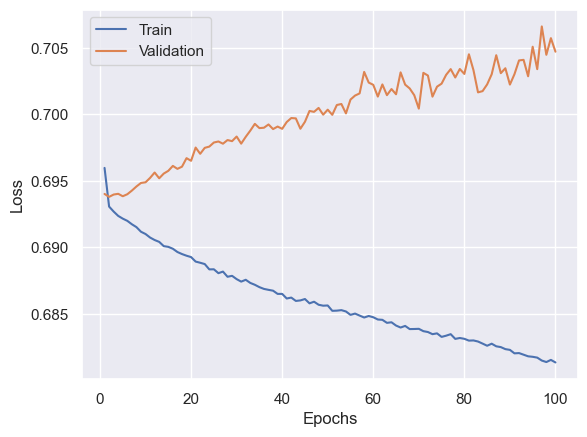

In [239]:
plt.plot(epochs, train_loss, label="Train")
plt.plot(epochs, test_loss, label="Validation")
# ax.set_title(f"{act}/{opt}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

523/523 [==============================] - 1s 2ms/step
Accuracy:55.27
523/523 [==============================] - 1s 2ms/step


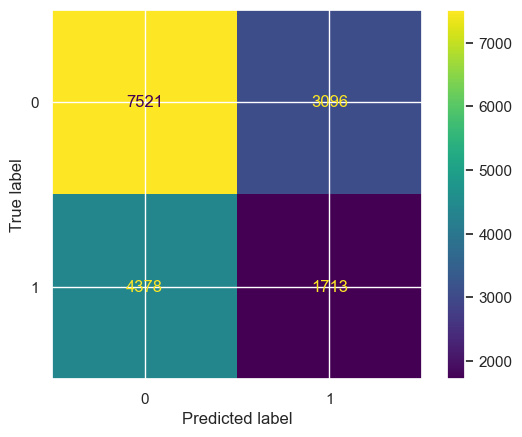

In [242]:
print(f'Accuracy:{accuracy_score(test_classes, model.predict(test_inputs).round()) * 100:.2f}')
cm = confusion_matrix(test_classes, model.predict(test_inputs).round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


#### Different configuration of NN

In [243]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [244]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [245]:
target = train_set[:, 25]


history = model.fit(
    train_inputs, target, epochs=100, validation_split=0.3, verbose=0 # type: ignore
)

In [246]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epochs = range(1, len(train_loss) + 1)

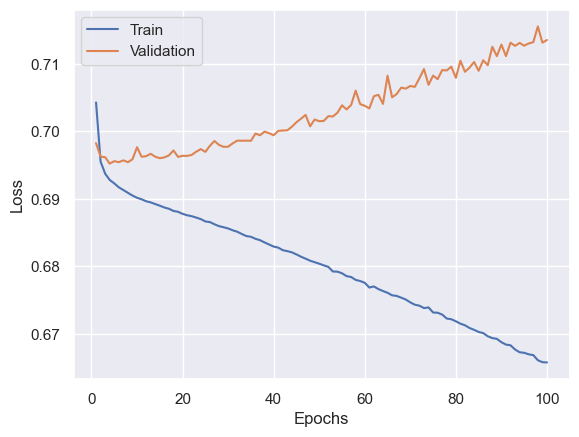

In [247]:
plt.plot(epochs, train_loss, label="Train")
plt.plot(epochs, test_loss, label="Validation")
# ax.set_title(f"{act}/{opt}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

523/523 [==============================] - 1s 2ms/step
Accuracy:48.11
523/523 [==============================] - 1s 2ms/step


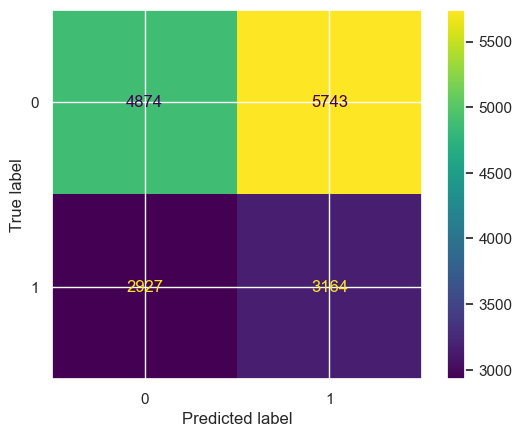

In [248]:
print(f'Accuracy:{accuracy_score(test_classes, model.predict(test_inputs).round()) * 100:.2f}')
cm = confusion_matrix(test_classes, model.predict(test_inputs).round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

different optimizer

In [249]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [250]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [251]:
target = train_set[:, 25]


history = model.fit(
    train_inputs, target, epochs=100, validation_split=0.3, verbose=0 # type: ignore
)

In [252]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epochs = range(1, len(train_loss) + 1)

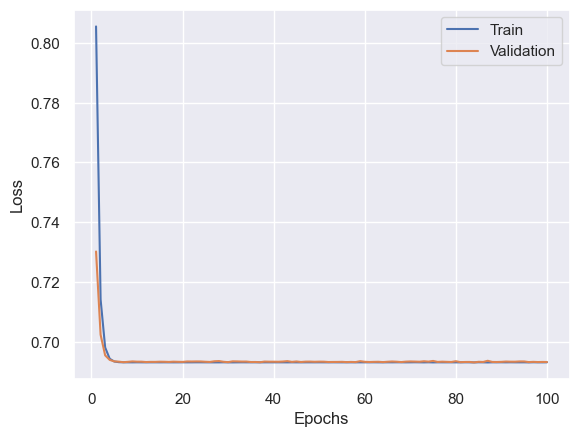

In [253]:
plt.plot(epochs, train_loss, label="Train")
plt.plot(epochs, test_loss, label="Validation")
# ax.set_title(f"{act}/{opt}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

523/523 [==============================] - 1s 2ms/step
Accuracy:63.54
523/523 [==============================] - 1s 2ms/step


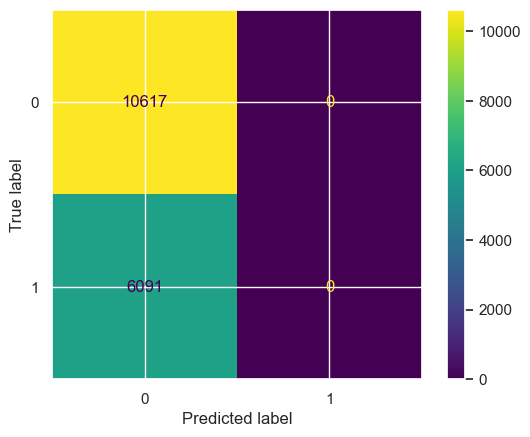

In [254]:
print(f'Accuracy:{accuracy_score(test_classes, model.predict(test_inputs).round()) * 100:.2f}')
cm = confusion_matrix(test_classes, model.predict(test_inputs).round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### NEURAL NETWORK - normal


In [255]:
(train_set, test_set) = train_test_split(smoking_df.values, train_size=0.7, 
random_state=420)
print(train_set)

[[  1.  50. 165. ...   0.   1.   0.]
 [  1.  45. 175. ...   1.   1.   0.]
 [  1.  55. 170. ...   0.   1.   0.]
 ...
 [  1.  25. 175. ...   0.   0.   0.]
 [  1.  35. 170. ...   0.   0.   0.]
 [  1.  50. 155. ...   0.   1.   1.]]


In [256]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(train_inputs)

In [257]:
model = tf.keras.Sequential(
    [
        normalizer,
        tf.keras.layers.Dense(12, activation="relu", name="layer1"),
        tf.keras.layers.Dense(8, activation="relu", name="layer2"),
        tf.keras.layers.Dense(1, activation="sigmoid", name="layer3"),
        tf.keras.layers.Dense(1, activation="sigmoid", name="layer4"),
    ]
)

In [258]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [259]:
target = train_set[:, 25]


history = model.fit(
    train_inputs, target, epochs=100, validation_split=0.3, verbose=0 # type: ignore
)

In [260]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epochs = range(1, len(train_loss) + 1)

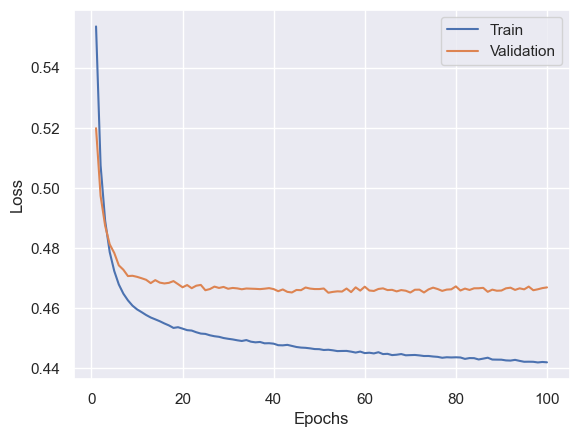

In [261]:
plt.plot(epochs, train_loss, label="Train")
plt.plot(epochs, test_loss, label="Validation")
# ax.set_title(f"{act}/{opt}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

523/523 [==============================] - 2s 2ms/step
Accuracy:75.36
523/523 [==============================] - 1s 2ms/step


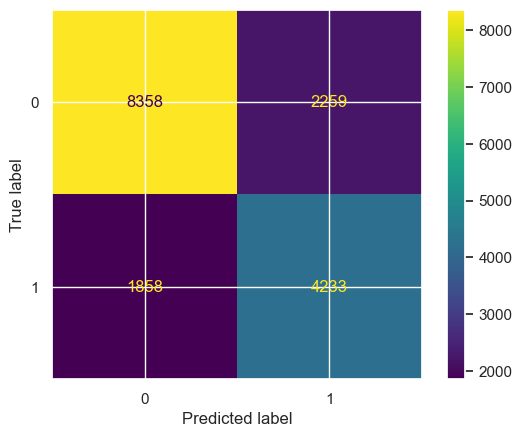

In [262]:
print(f'Accuracy:{accuracy_score(test_classes, model.predict(test_inputs).round()) * 100:.2f}')
cm = confusion_matrix(test_classes, model.predict(test_inputs).round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### Different configuration of NN

In [263]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [264]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [265]:
target = train_set[:, 25]


history = model.fit(
    train_inputs, target, epochs=100, validation_split=0.3, verbose=0 # type: ignore
)

In [266]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epochs = range(1, len(train_loss) + 1)

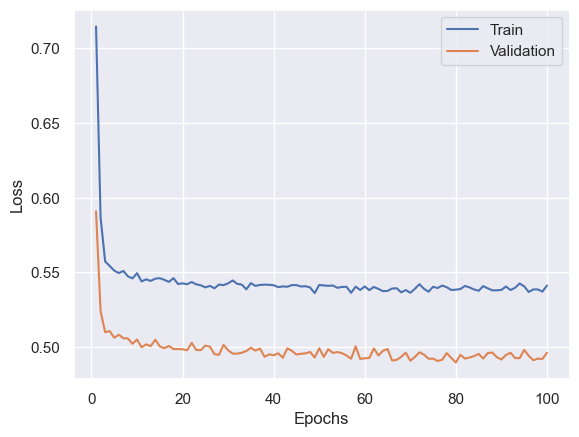

In [267]:
plt.plot(epochs, train_loss, label="Train")
plt.plot(epochs, test_loss, label="Validation")
# ax.set_title(f"{act}/{opt}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

523/523 [==============================] - 1s 2ms/step
Accuracy:74.10
523/523 [==============================] - 1s 2ms/step


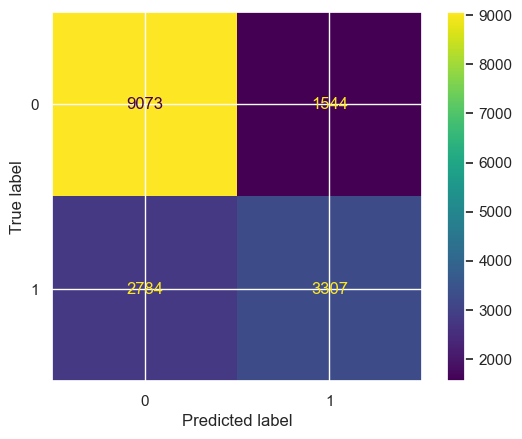

In [269]:
print(f'Accuracy:{accuracy_score(test_classes, model.predict(test_inputs).round()) * 100:.2f}')
cm = confusion_matrix(test_classes, model.predict(test_inputs).round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

different optimizer


In [270]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [271]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [272]:
target = train_set[:, 25]


history = model.fit(
    train_inputs, target, epochs=100, validation_split=0.3, verbose=0 # type: ignore
)

In [273]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epochs = range(1, len(train_loss) + 1)

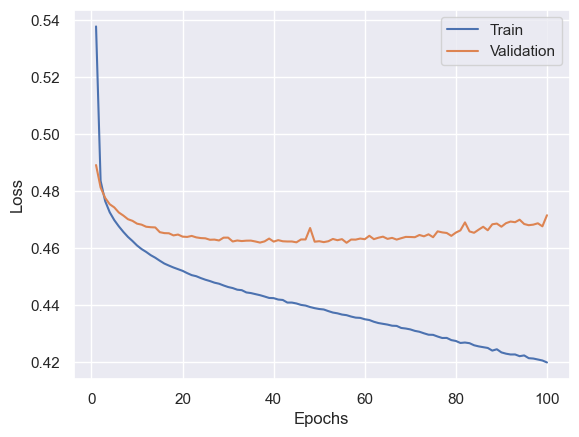

In [274]:
plt.plot(epochs, train_loss, label="Train")
plt.plot(epochs, test_loss, label="Validation")
# ax.set_title(f"{act}/{opt}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

523/523 [==============================] - 2s 2ms/step
Accuracy:75.46
523/523 [==============================] - 2s 3ms/step


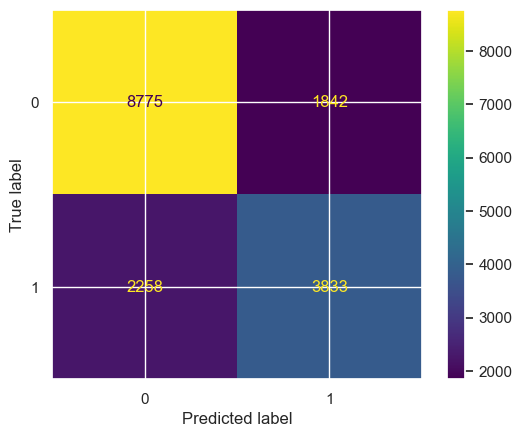

In [275]:
print(f'Accuracy:{accuracy_score(test_classes, model.predict(test_inputs).round()) * 100:.2f}')
cm = confusion_matrix(test_classes, model.predict(test_inputs).round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# SUMMARY

For dataset altered by SMOTE results are:
- DTC: 0.80636
- NBC: 0.70642
- KNC3: 0.70409
- KN11: 0.71103
- KN113: 0.71187
- NN1: 55.27%
- NN2: nothing
- NN3: nothing 

For dataset without altering results are:
- DTC: 0.77238
- NBC: 0.70642
- KNC3: 0.70409
- KN11: 0.71103
- KN113: 0.71187
- NN1: 75.36
- NN2: 74.10
- NN3: 75.46